In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
import bootcampviztools as bvt
import warnings 
warnings.filterwarnings('ignore')

df_vg = pd.read_csv("../data/Sales_Videogames_90-24_(Clean).csv")

In [2]:
# Se transforman los valores de ambas columnas de fechas, a un datetime
df_vg["fecha_lanzamiento"] = pd.to_datetime(df_vg["fecha_lanzamiento"])
df_vg["ultima_actualizacion"] = pd.to_datetime(df_vg["ultima_actualizacion"])

In [3]:
df_vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60230 entries, 0 to 60229
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   titulo                  60230 non-null  object        
 1   consola                 60230 non-null  object        
 2   genero                  60230 non-null  object        
 3   editor                  60230 non-null  object        
 4   desarrollador           60230 non-null  object        
 5   puntuacion_critica      6648 non-null   float64       
 6   ventas_totales          60230 non-null  int64         
 7   ventas_na               60230 non-null  int64         
 8   ventas_japon            60230 non-null  int64         
 9   ventas_europa           60230 non-null  int64         
 10  ventas_otros            60230 non-null  int64         
 11  fecha_lanzamiento       60230 non-null  datetime64[ns]
 12  ultima_actualizacion    60230 non-null  dateti

In [4]:
df_vg.groupby(['genero'])[['ventas_na', 'ventas_japon', 'ventas_europa', 'ventas_otros']].sum().sort_values(by="ventas_japon", ascending=False)

,ventas_na,ventas_japon,ventas_europa,ventas_otros
genero,,,,
Role-playing,171419999,125680000,90890000,33710000
Sports,604079995,104830000,341400000,128059999
Action,562330000,78070000,340829995,112190000
Fighting,172699999,57070000,79690000,28570000
Misc,295179999,55520000,146580000,58510000
Adventure,157259999,46070000,91500000,30110000
Strategy,47060000,36800000,27000000,7280000
Simulation,152819999,35840000,86830000,24340000
Shooter,505599999,30990000,323179999,108180000


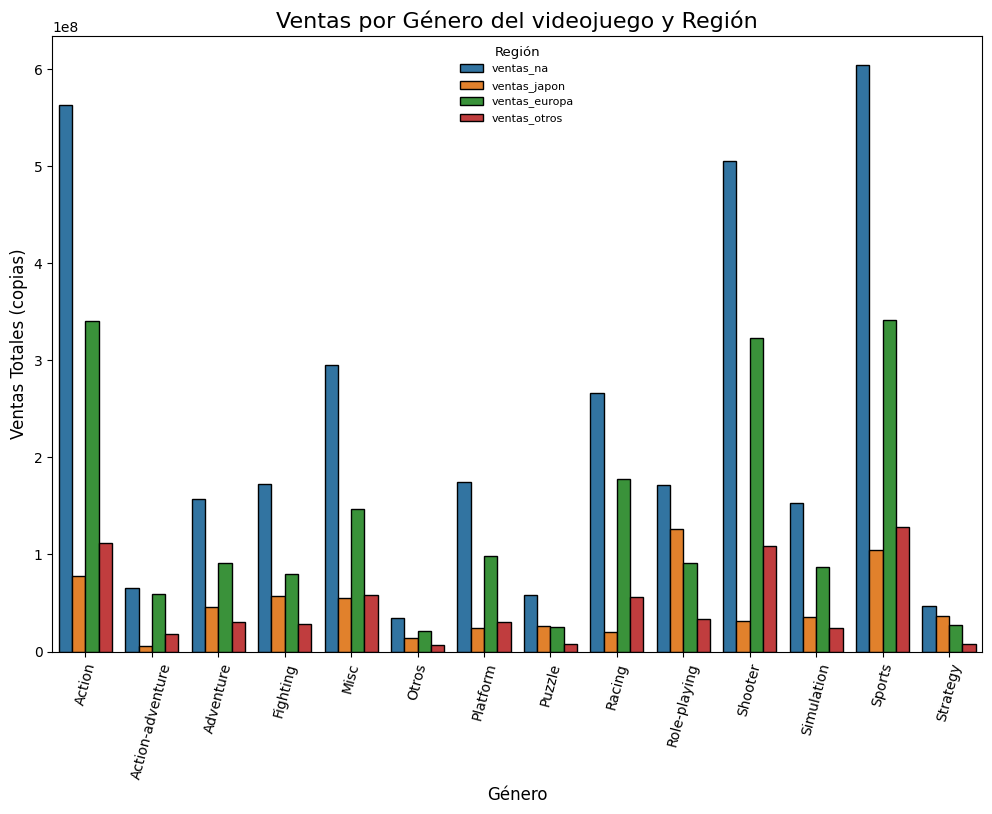

In [5]:
# Agrupar los datos por género y región
sales_by_genre_region = df_vg.groupby(['genero'])[['ventas_na', 'ventas_japon', 'ventas_europa', 'ventas_otros']].sum().reset_index()

# Convertir a formato largo para graficar
sales_by_genre_region_melted = sales_by_genre_region.melt(id_vars=['genero'],
                                                         value_vars=['ventas_na', 'ventas_japon', 'ventas_europa', 'ventas_otros'],
                                                         var_name='region', value_name='ventas')

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(data=sales_by_genre_region_melted, 
            x='genero', 
            y='ventas', 
            hue='region', 
            estimator=sum,
            edgecolor="black")

# Título y etiquetas
plt.title('Ventas por Género del videojuego y Región', fontsize=16)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Ventas Totales (copias)', fontsize=12)
plt.xticks(rotation=75)

# Personalizar la legenda
plt.legend(title="Región", title_fontsize='9.5', fontsize='8', frameon=False)

# Mostrar el gráfico
plt.show()

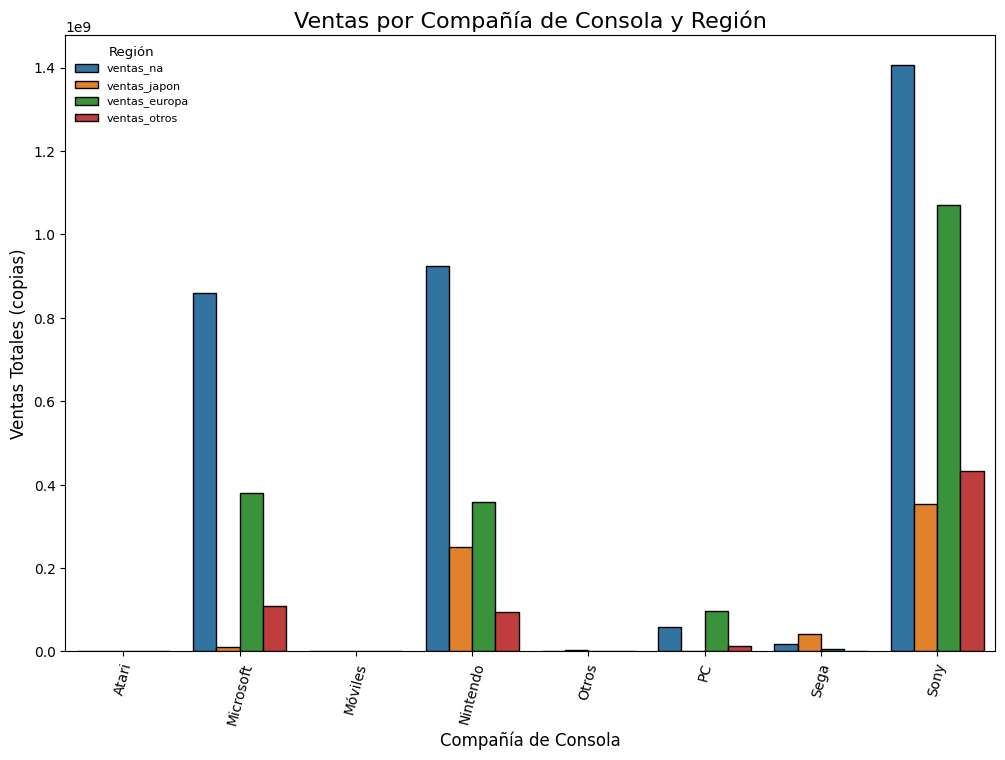

In [6]:
# Agrupar los datos por género y compañía de consolas
sales_by_console_company = df_vg.groupby(['empresa_consola'])[['ventas_na', 'ventas_japon', 'ventas_europa', 'ventas_otros']].sum().reset_index()

# Convertir a formato largo para graficar
sales_by_console_company_melted = sales_by_console_company.melt(id_vars=['empresa_consola'],
                                                               value_vars=['ventas_na', 'ventas_japon', 'ventas_europa', 'ventas_otros'],
                                                               var_name='region', value_name='sales')

# Crear el gráfico de barras apiladas
plt.figure(figsize=(12, 8))
sns.barplot(data=sales_by_console_company_melted, 
            x='empresa_consola', 
            y='sales', 
            hue='region', 
            estimator=sum,
            edgecolor="black")

# Título y etiquetas
plt.title('Ventas por Compañía de Consola y Región', fontsize=16)
plt.xlabel('Compañía de Consola', fontsize=12)
plt.ylabel('Ventas Totales (copias)', fontsize=12)
plt.xticks(rotation=75)

# Personalizar la legenda
plt.legend(title="Región", title_fontsize='9.5', fontsize='8', frameon=False)

# Mostrar el gráfico
plt.show()


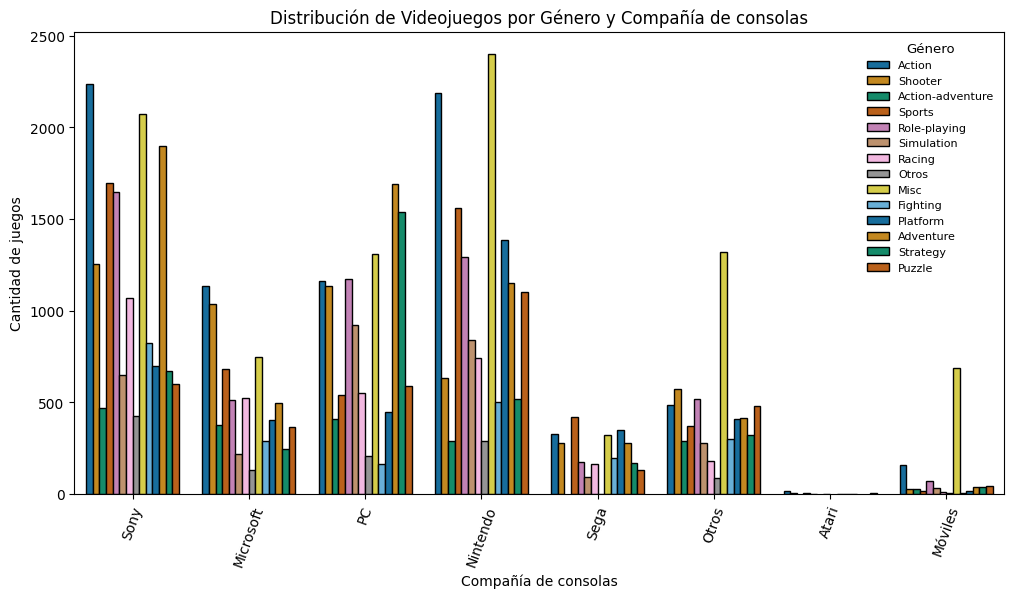

In [7]:
# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
sns.countplot(x="empresa_consola", 
              hue="genero", 
              palette= "colorblind", 
              data=df_vg,
              edgecolor="black")

# Personalización del gráfico
plt.xticks(rotation=70)
plt.xlabel('Compañía de consolas')
plt.ylabel('Cantidad de juegos')
plt.title('Distribución de Videojuegos por Género y Compañía de consolas')

# Personalizar la legenda
plt.legend(title="Género", title_fontsize='9.5', fontsize='8', frameon=False)

plt.show()

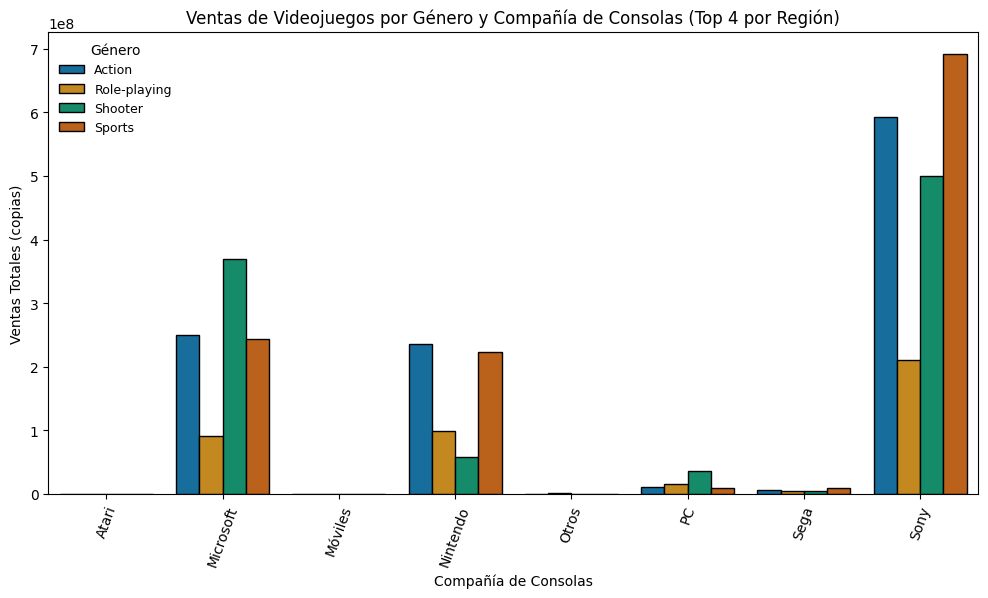

In [8]:
# Calcular los tres géneros más populares por región (sumando las ventas)
top_generos_por_region = df_vg.groupby(['genero'])[['ventas_na', 'ventas_japon', 'ventas_europa', 'ventas_otros']].sum()

# Filtrar los tres géneros principales por cada región
top_generos_na = top_generos_por_region.nlargest(3, 'ventas_na').index
top_generos_jp = top_generos_por_region.nlargest(3, 'ventas_japon').index
top_generos_eu = top_generos_por_region.nlargest(3, 'ventas_europa').index
top_generos_otros = top_generos_por_region.nlargest(3, 'ventas_otros').index

# Filtrar el DataFrame original para incluir solo los géneros más populares en cada región
df_top_generos = df_vg[df_vg['genero'].isin(top_generos_na) |
                      df_vg['genero'].isin(top_generos_jp) |
                      df_vg['genero'].isin(top_generos_eu) |
                      df_vg['genero'].isin(top_generos_otros)]

# Agrupar por compañía de consola y género, sumando las ventas totales ya presentes
sales_by_console_genre = df_top_generos.groupby(['empresa_consola', 'genero'])['ventas_totales'].sum().reset_index()

# Crear el gráfico de barras con las ventas totales por compañía de consola y género
plt.figure(figsize=(12, 6))
sns.barplot(x="empresa_consola", 
            y="ventas_totales", 
            hue="genero", 
            palette="colorblind", 
            data=sales_by_console_genre,
            edgecolor="black")

# Personalización del gráfico
plt.xticks(rotation=70)
plt.xlabel('Compañía de Consolas')
plt.ylabel('Ventas Totales (copias)')
plt.title('Ventas de Videojuegos por Género y Compañía de Consolas (Top 4 por Región)')

# Personalizar la legenda
plt.legend(title="Género", title_fontsize='10', fontsize='9', frameon=False)

plt.show()

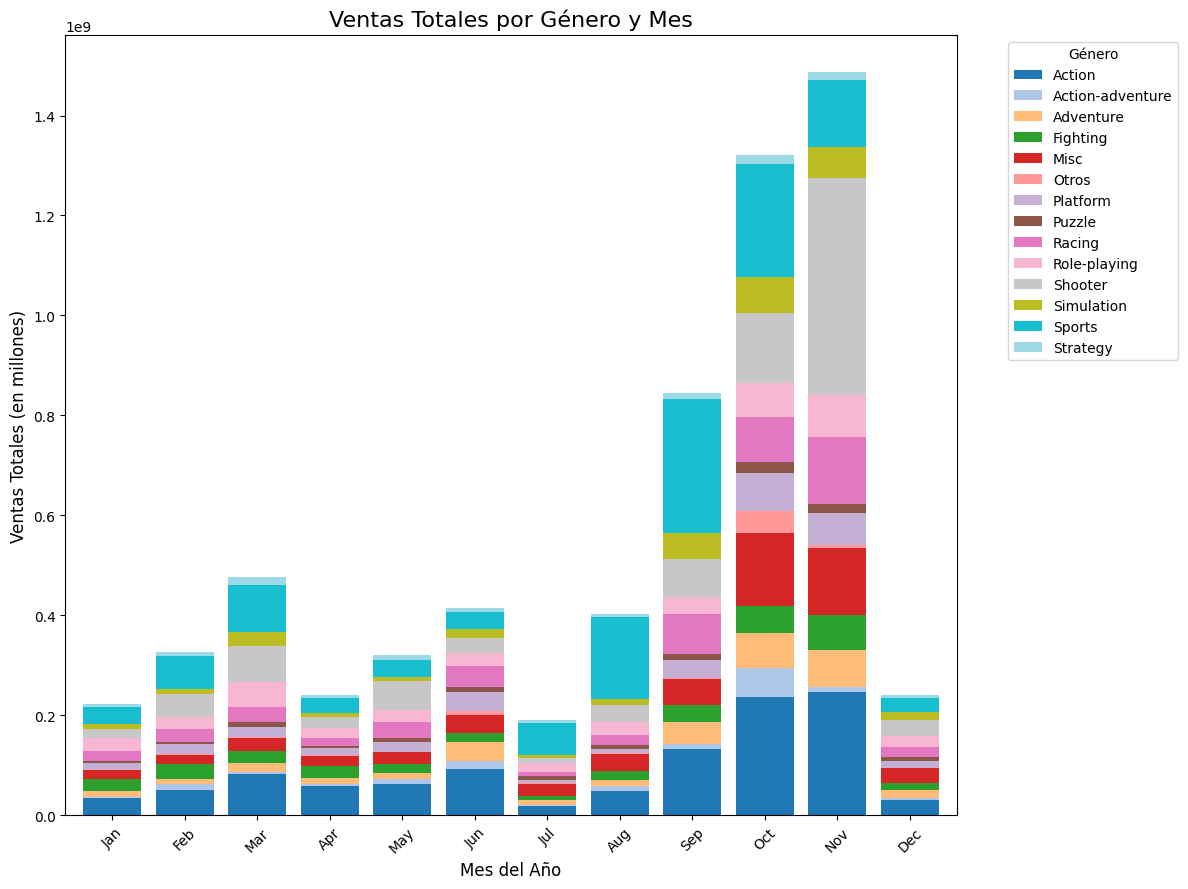

In [9]:
# Extraer el mes de la fecha de lanzamiento
df_vg['mes'] = df_vg['fecha_lanzamiento'].dt.month  # Extraer el mes

# Agrupar por mes y género, sumando las ventas
stacked_data = df_vg.groupby(['mes', 'genero'])['ventas_totales'].sum().unstack(fill_value=0)

# Reemplazar los números de los meses con los nombres
month_names = {i: calendar.month_abbr[i] for i in range(1, 13)}
stacked_data.index = stacked_data.index.map(month_names)

# Crear la figura y el eje con un tamaño ajustado
fig, ax = plt.subplots(figsize=(12,9))

# Crear el gráfico de barras apiladas
stacked_data.plot(kind='bar', stacked=True, colormap='tab20', width=0.8, ax=ax)

# Personalización del gráfico
ax.set_title("Ventas Totales por Género y Mes", fontsize=16)
ax.set_xlabel("Mes del Año", fontsize=12)
ax.set_ylabel("Ventas Totales (en millones)", fontsize=12)
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor legibilidad
plt.legend(title="Género", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Ajustar márgenes para evitar solapamiento
plt.show()

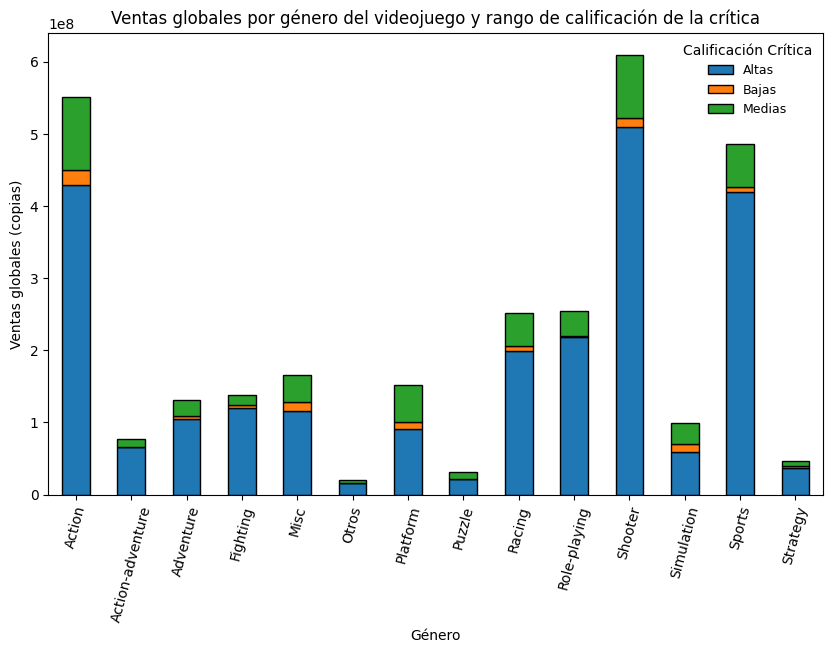

In [17]:
# Agrupar por género y rango de calificación de la crítica, y sumar las ventas globales
sales_by_genre = df_vg.groupby(['genero', 'categoria_calificacion'])['ventas_totales'].sum().unstack()

# Gráfico de barras apiladas
sales_by_genre.plot(kind='bar', 
                    stacked=True, 
                    figsize=(10, 6),
                    edgecolor="black")

# Personalizar el gráfico
plt.title('Ventas globales por género del videojuego y rango de calificación de la crítica')
plt.xlabel('Género')
plt.ylabel('Ventas globales (copias)')
plt.xticks(rotation=75)

# Personalizar la legenda
plt.legend(title="Calificación Crítica", title_fontsize='10', fontsize='9', frameon=False)

plt.show()

##### En la gráfica anterior las ventas totales discrepan con las ventas totales reales, esto debido a que no se tienen datos de la critica del 89% de los videojuegos en general.

In [11]:
df_vg.isna().mean()*100

titulo                     0.000000
consola                    0.000000
genero                     0.000000
editor                     0.000000
desarrollador              0.000000
puntuacion_critica        88.962311
ventas_totales             0.000000
ventas_na                  0.000000
ventas_japon               0.000000
ventas_europa              0.000000
ventas_otros               0.000000
fecha_lanzamiento          0.000000
ultima_actualizacion       0.000000
empresa_consola            0.000000
categoria_calificacion    88.987216
mes                        0.000000
dtype: float64

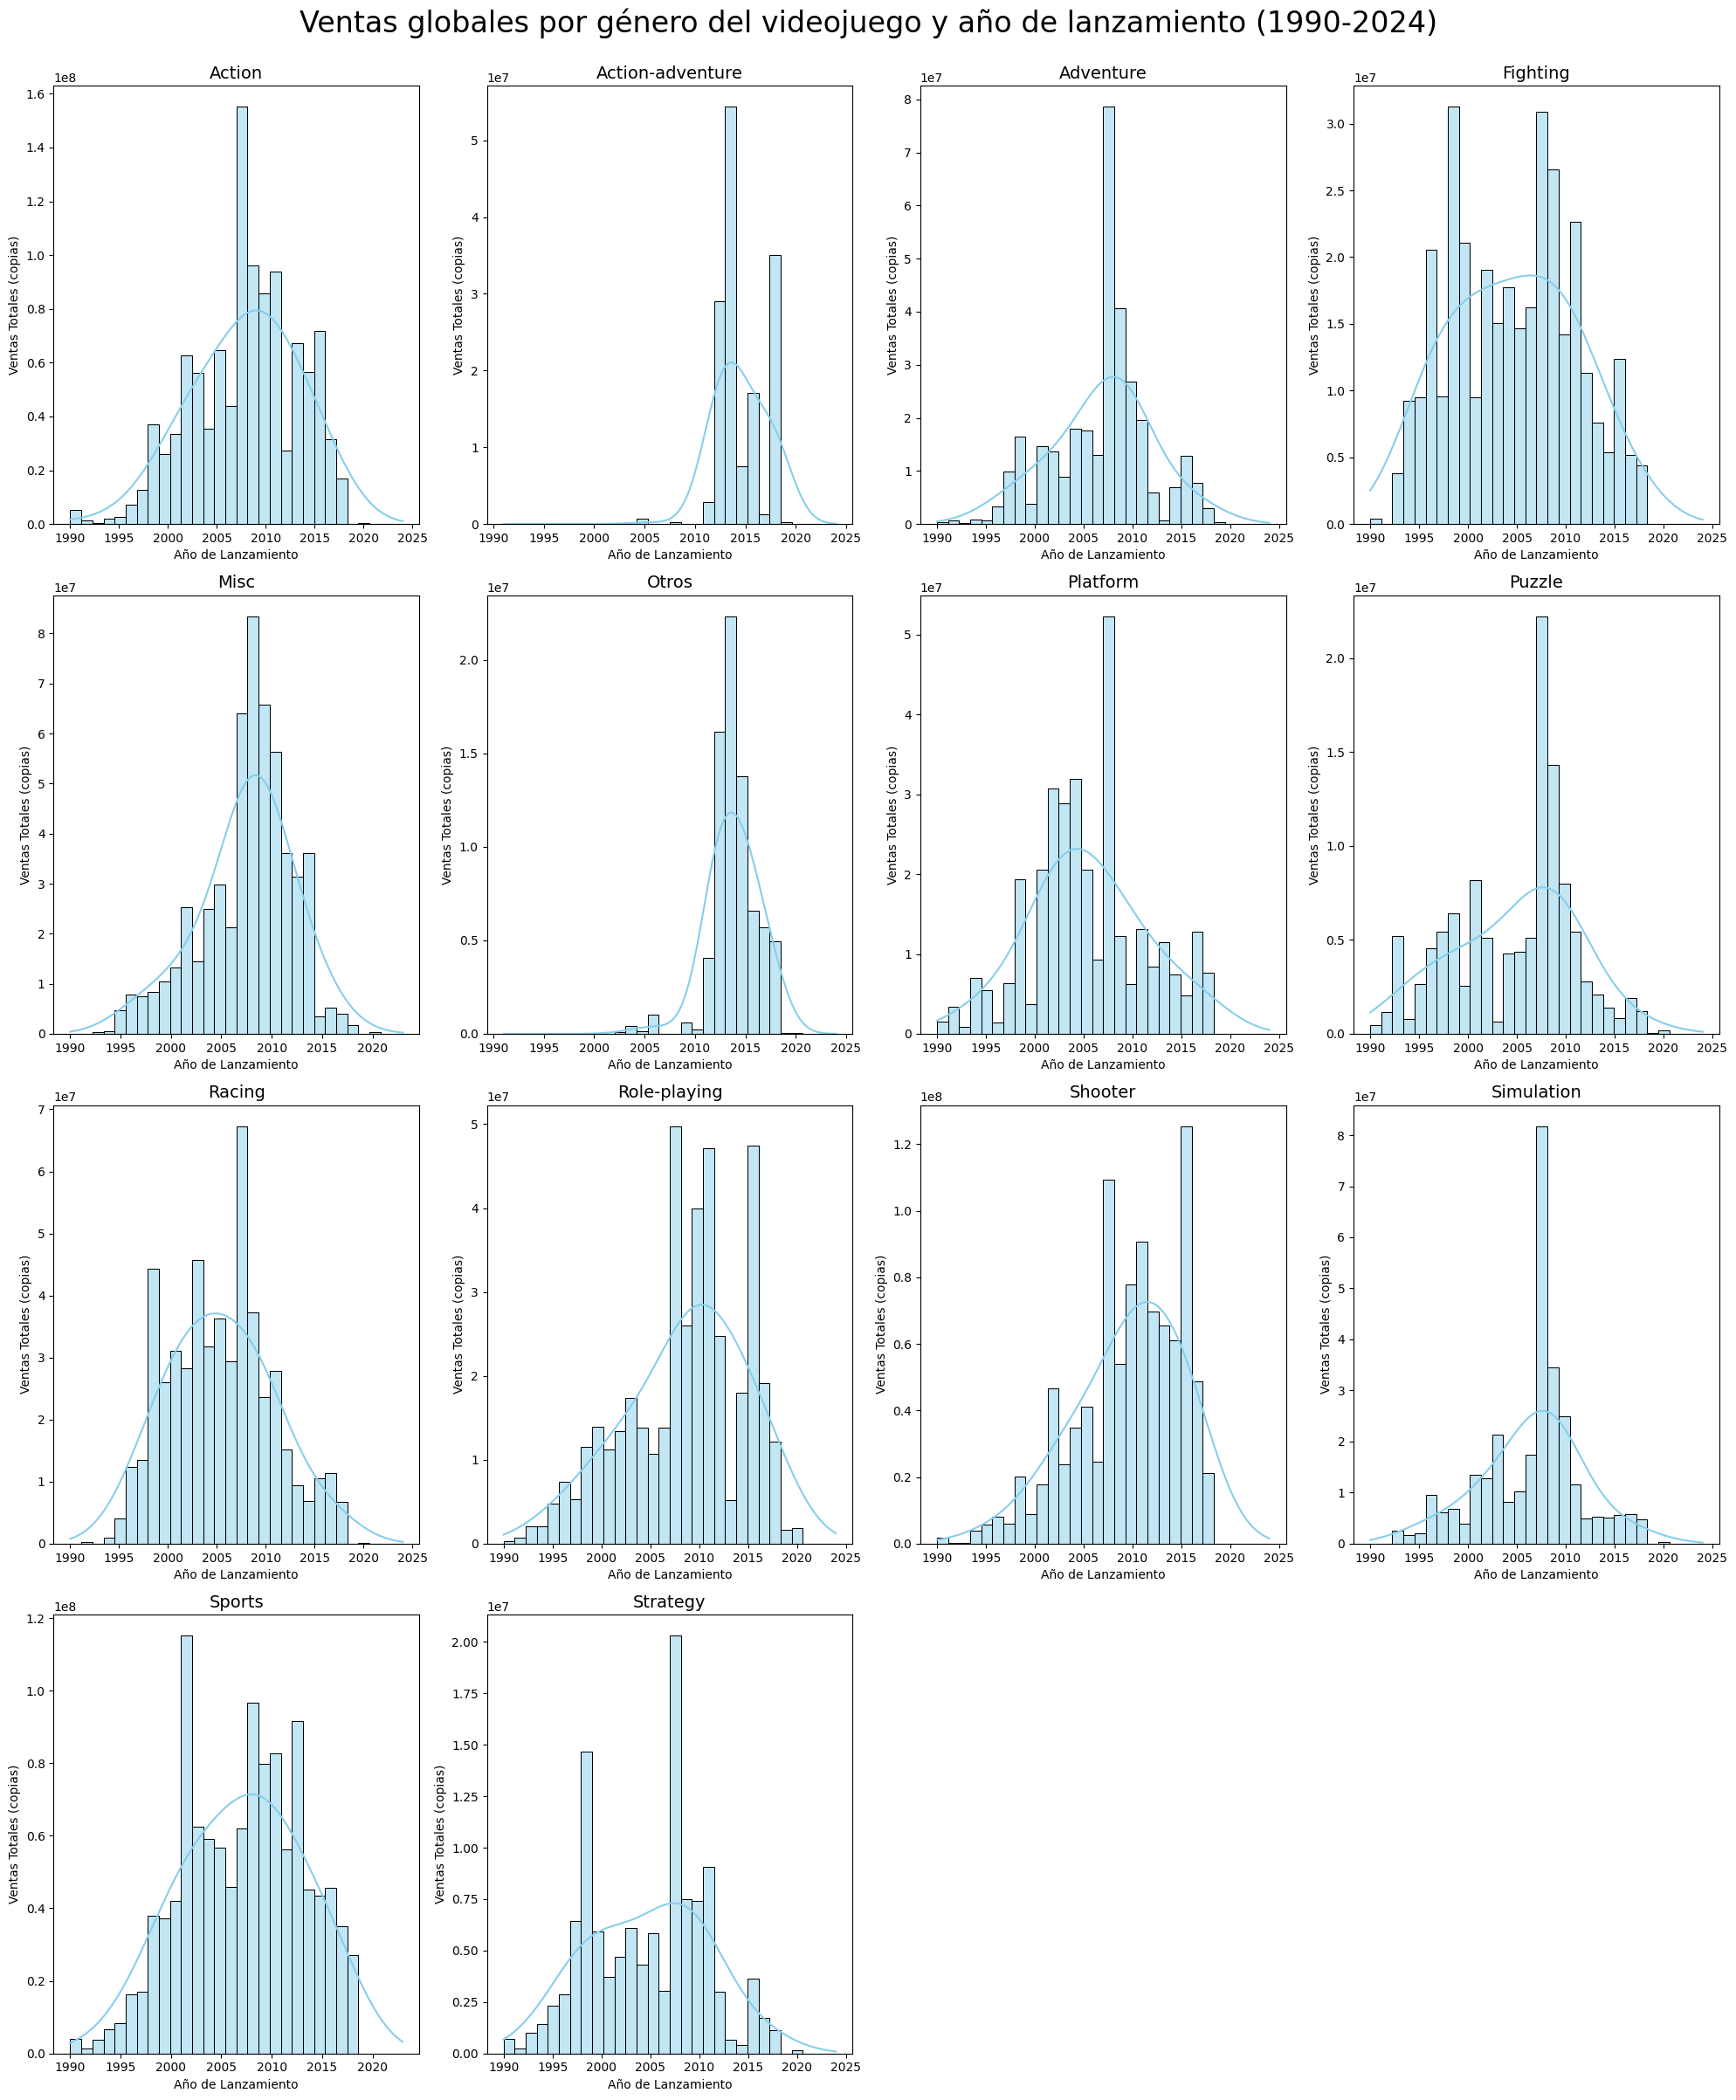

In [12]:
# Extraer el año de 'release_date'
df_vg['año_lanzamiento'] = df_vg['fecha_lanzamiento'].dt.year

# Agrupar los datos por género y año de lanzamiento
ventas_por_genero_año = df_vg.groupby(['genero', 'año_lanzamiento'])['ventas_totales'].sum().reset_index()

# Crear el gráfico con subgráficos
generos = ventas_por_genero_año['genero'].unique()
n_generos = len(generos)
n_cols = 4  # Número de columnas
n_rows = (n_generos + n_cols - 1) // n_cols  # Número de filas necesario

# Crear el objeto fig y los ejes (axes)
fig, axes = plt.subplots(n_rows, 
                         n_cols, 
                         figsize=(20, 6 * n_rows))

# Aplanar la matriz de ejes
axes = axes.flatten()

# Crear un histograma para cada género
for i, genero in enumerate(generos):
    ax = axes[i]  # Obtener el eje correspondiente
    data = ventas_por_genero_año[ventas_por_genero_año['genero'] == genero]
    
    # Crear el histograma
    sns.histplot(data=data, 
                 x="año_lanzamiento", 
                 weights="ventas_totales", 
                 kde=True, 
                 ax=ax, 
                 color="skyblue", 
                 bins=30,
                 edgecolor="black")
    
    # Títulos y etiquetas
    ax.set_title(genero, fontsize=14)
    ax.set_xlabel("Año de Lanzamiento")
    ax.set_ylabel("Ventas Totales (copias)")

# Eliminar cualquier subgráfico vacío (si hay)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Titulo principal
plt.suptitle("Ventas globales por género del videojuego y año de lanzamiento (1990-2024)", y=1, fontsize=24)

# Ajustar el espaciado
plt.tight_layout()

plt.show()


#### Para determinar que pasa entre los años 2021-2024, se muestran a continuación los valores de las ventas globales por genero y año de lanzamiento

In [13]:
# Agrupar por género y año de lanzamiento, seleccionando el videojuego con la venta más alta
mas_vendido_por_genero = df_vg.loc[df_vg.groupby(['genero', 'año_lanzamiento'])['ventas_totales'].idxmax()]

# Seleccionar las columnas relevantes
mas_vendido_por_genero = mas_vendido_por_genero[['genero', 'titulo', 'ventas_totales', 'año_lanzamiento']]

# Ordenar los resultados para mejorar la visualización
mas_vendido_por_genero = mas_vendido_por_genero.sort_values(by=['año_lanzamiento', 'ventas_totales'], ascending=[False, False])

# Mostrar solo el juego más vendido por cada año (independientemente del género)
mas_vendido_por_año = mas_vendido_por_genero.drop_duplicates('año_lanzamiento', keep='first')

mas_vendido_por_año

# NO HAY DATOS DE VENTAS ENTRE LOS AÑOS 2021-2024
# En caso de necesitarlo, utilizando una slicing con "mas_vendido_por_genero" podemos ver los juegos mas vendidos por cada año por genero
# Por ejemplo mas_vendido_por_genero["año_lanzamiento"] == 2010, me muestra los juegos mas vendidos por genero en el año 2010

,genero,titulo,ventas_totales,año_lanzamiento
22305,Action,Arcade Archives: Over Top,0,2024
18761,Action,Dead Island 2,0,2023
18685,Action,God of War: Ragnarök,0,2022
18766,Action,Persona 5 Strikers,0,2021
1900,Role-playing,Final Fantasy Type-0,810000,2020
1884,Role-playing,Yokai Watch 3: Sukiyaki,810000,2019
7,Action-adventure,Red Dead Redemption 2,13940000,2018
11,Shooter,Call of Duty: WWII,13400000,2017
17,Sports,FIFA 17,10940000,2016
4,Shooter,Call of Duty: Black Ops 3,15090000,2015


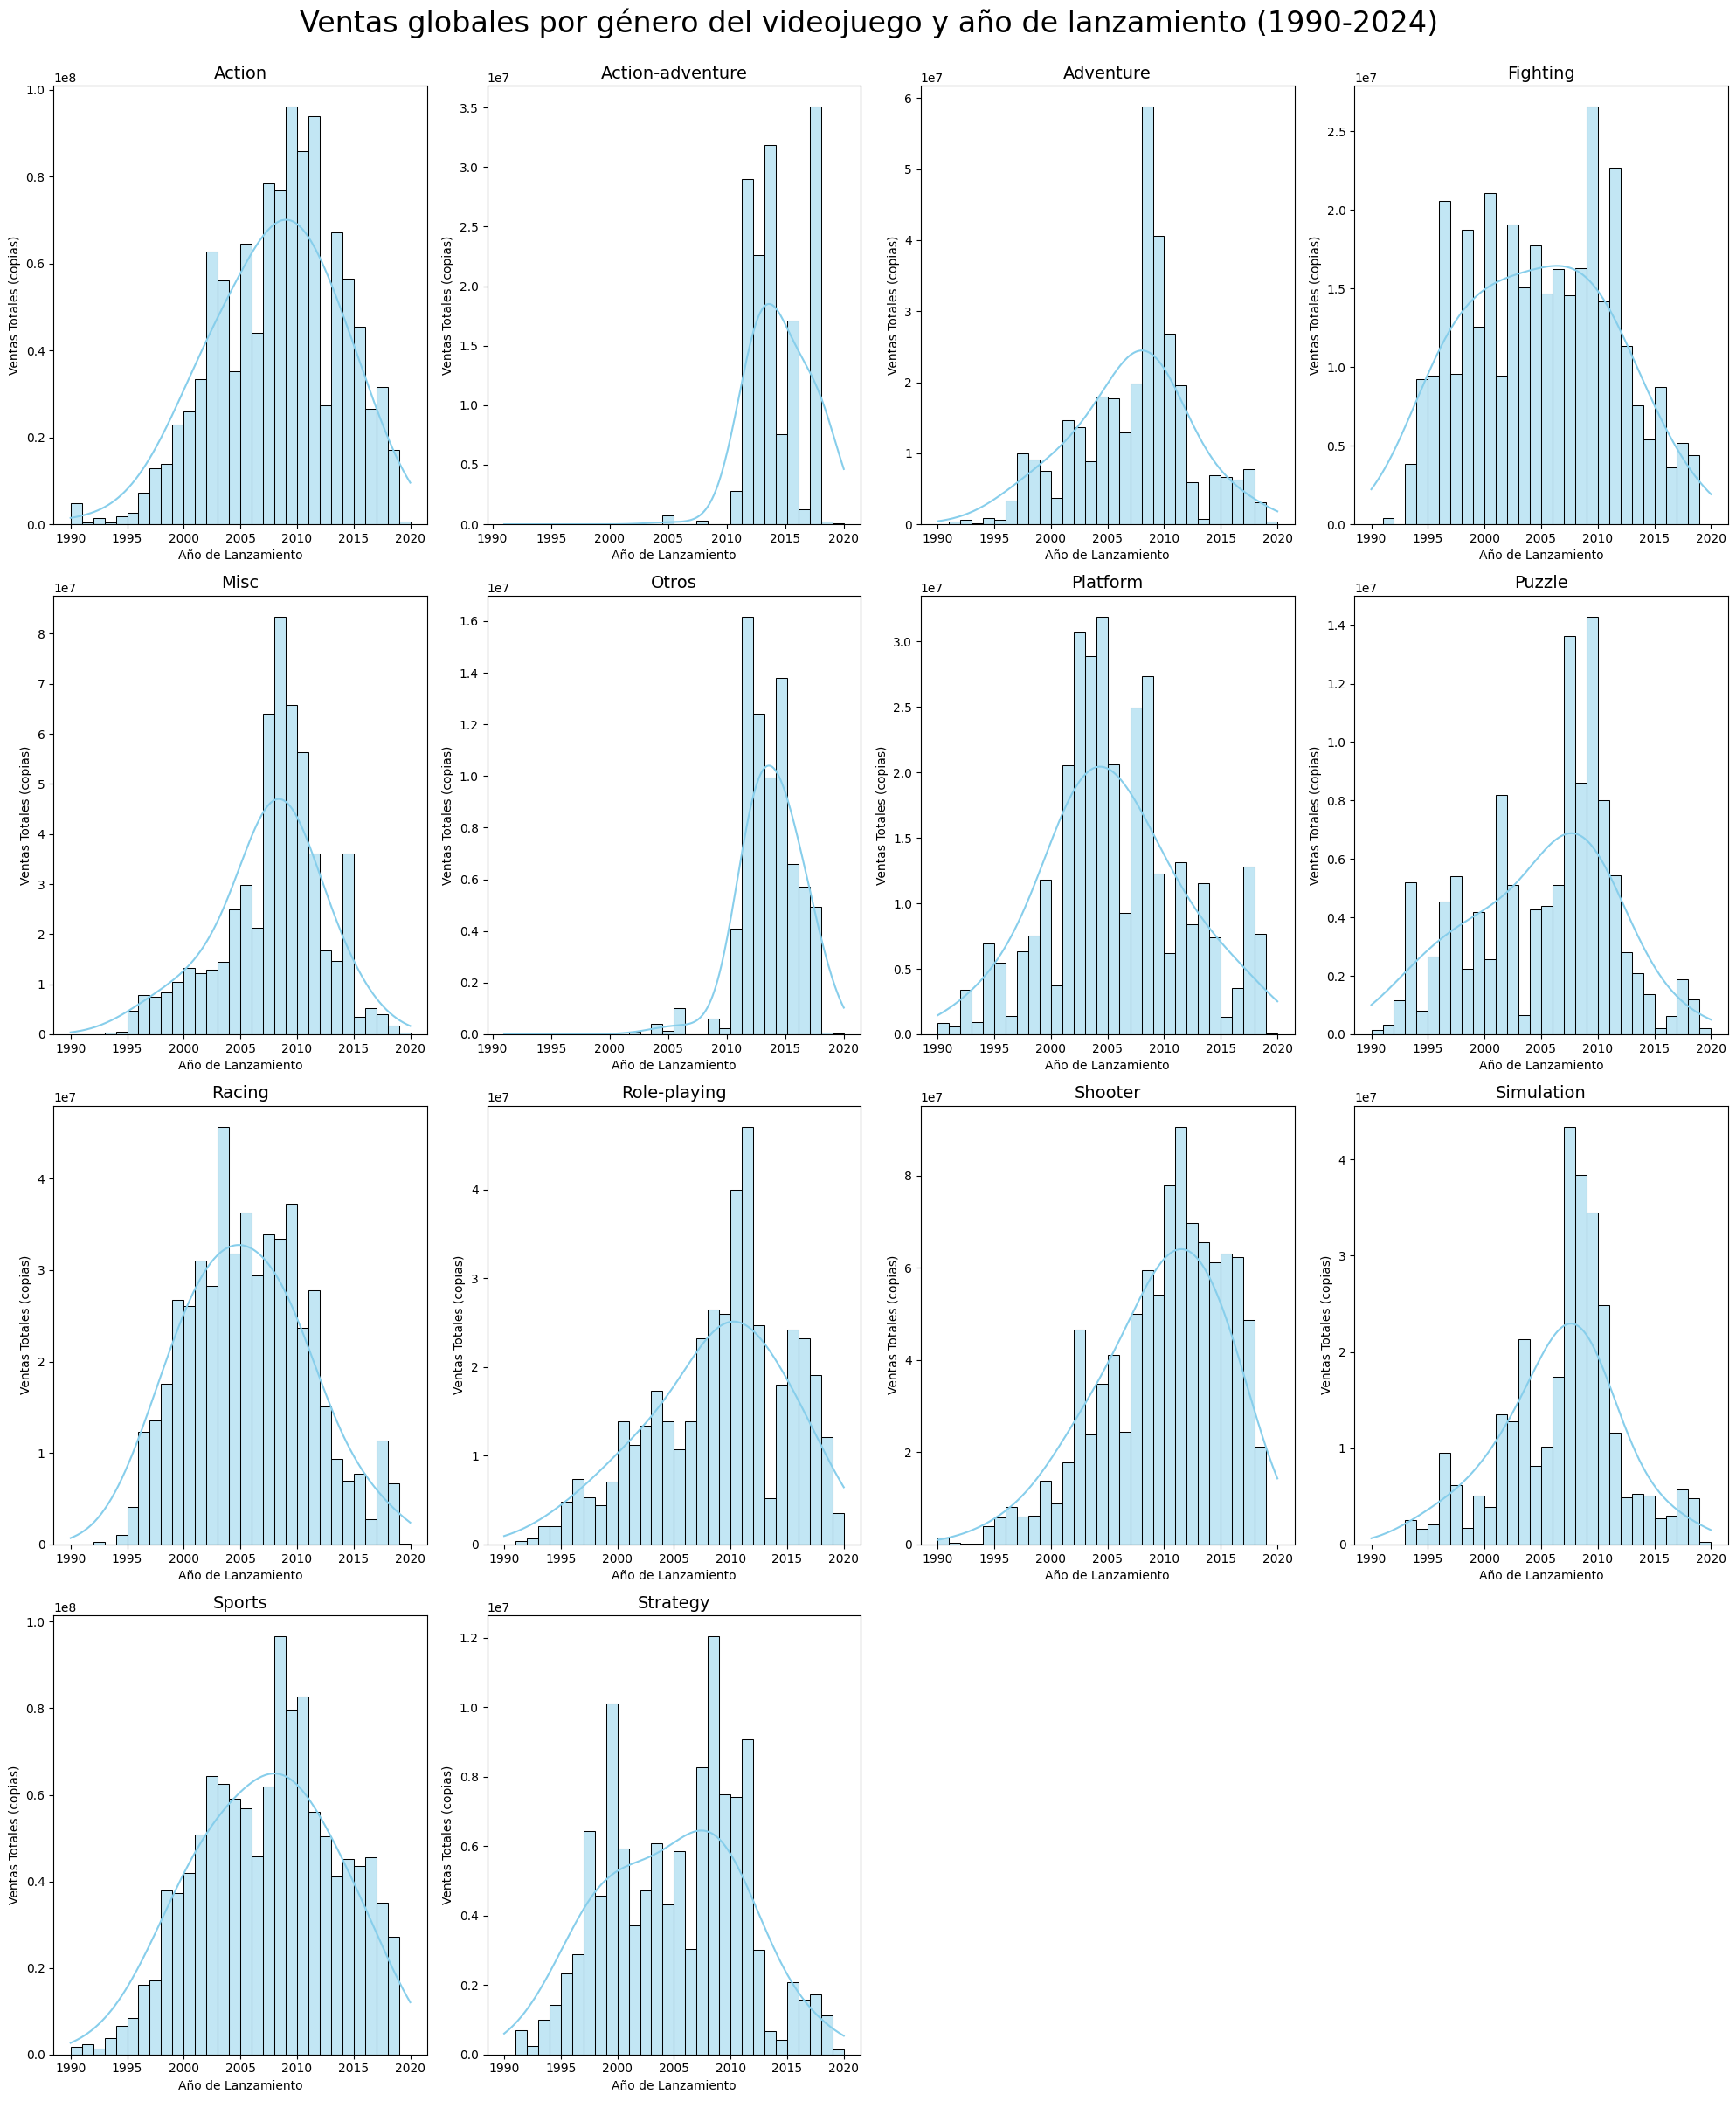

In [18]:
# Extraer el año de 'release_date'
df_vg['año_lanzamiento'] = df_vg['fecha_lanzamiento'].dt.year

# Filtrar los años 2021-2024 (~ invierte la condicion .isin(), ahora significara lo contrario)
df_vg_filtered = df_vg[~df_vg['año_lanzamiento'].isin([2021, 2022, 2023, 2024])]

# Agrupar los datos por género y año de lanzamiento
ventas_por_genero_año = df_vg_filtered.groupby(['genero', 'año_lanzamiento'])['ventas_totales'].sum().reset_index()

# Crear el gráfico con subgráficos
generos = ventas_por_genero_año['genero'].unique()
n_generos = len(generos)
n_cols = 4  # Número de columnas
n_rows = (n_generos + n_cols - 1) // n_cols  # Número de filas necesario

# Crear el objeto fig y los ejes (axes)
fig, axes = plt.subplots(n_rows, 
                         n_cols, 
                         figsize=(20, 6 * n_rows))

# Aplanar la matriz de ejes
axes = axes.flatten()

# Crear un histograma para cada género
for i, genero in enumerate(generos):
    ax = axes[i]  # Obtener el eje correspondiente
    data = ventas_por_genero_año[ventas_por_genero_año['genero'] == genero]
    
    # Crear el histograma
    sns.histplot(data=data, 
                 x="año_lanzamiento", 
                 weights="ventas_totales", 
                 kde=True, 
                 ax=ax, 
                 color="skyblue", 
                 bins=30,
                 edgecolor="black")
    
    # Títulos y etiquetas
    ax.set_title(genero, fontsize=14)
    ax.set_xlabel("Año de Lanzamiento")
    ax.set_ylabel("Ventas Totales (copias)")

# Eliminar cualquier subgráfico vacío (si hay)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Titulo principal
plt.suptitle("Ventas globales por género del videojuego y año de lanzamiento (1990-2024)", y=1, fontsize=24)

# Ajustar el espaciado
plt.tight_layout()

plt.show()


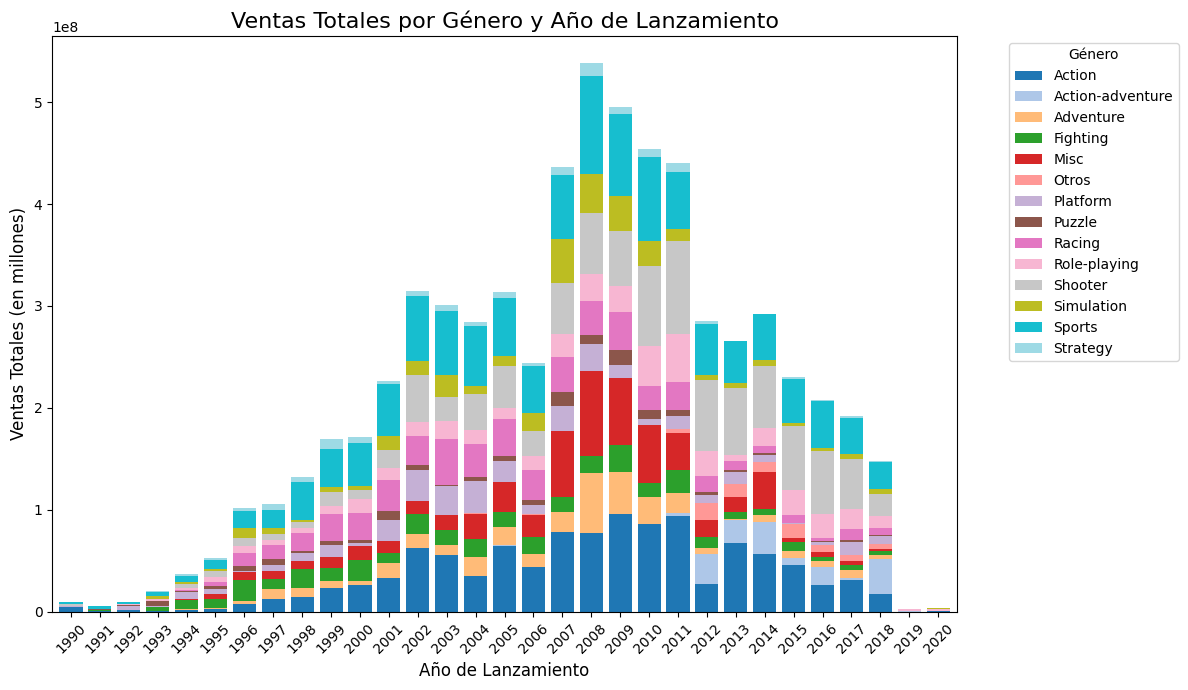

In [15]:
# Extraer el año de lanzamiento
df_vg['año'] = df_vg['fecha_lanzamiento'].dt.year  # Extraer el año

# Filtrar los años donde no hay ventas (2021-2024)
df_vg_filtrado = df_vg[(df_vg['año'] < 2021) & (df_vg['año'].notnull())]

# Agrupar por año y género, sumando las ventas
stacked_data_año = df_vg_filtrado.groupby(['año', 'genero'])['ventas_totales'].sum().unstack(fill_value=0)

# Crear el gráfico de barras apiladas con tamaño ajustado
fig, ax = plt.subplots(figsize=(12, 7))
stacked_data_año.plot(kind='bar', stacked=True, colormap='tab20', width=0.8, ax=ax)

# Personalización del gráfico
ax.set_title("Ventas Totales por Género y Año de Lanzamiento", fontsize=16)
ax.set_xlabel("Año de Lanzamiento", fontsize=12)
ax.set_ylabel("Ventas Totales (en millones)", fontsize=12)
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mejor legibilidad
plt.legend(title="Género", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Ajustar elementos del gráfico
plt.show()